#### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

### Load the dataset

In [5]:
filename = ('parkinsons.data')

In [6]:
Parkinson_data = pd.read_csv(filename)

In [7]:
Parkinson_data.head() 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
Parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
Parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
Parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
Parkinson_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

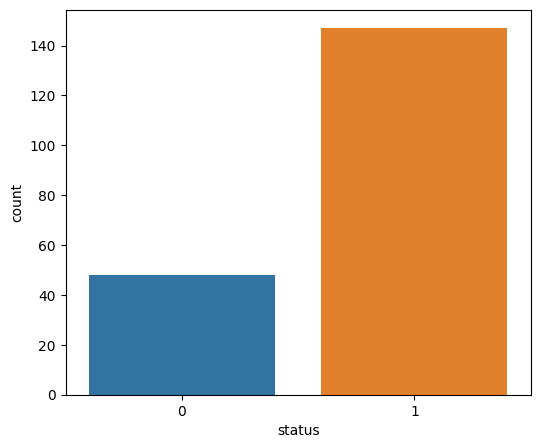

In [12]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = Parkinson_data['status'])


In [75]:
Parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [14]:
Parkinson_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [15]:
#Status 
#0 means - The patient do not have Parkinson disease
#1 means the patient have Parkinson disease
X = Parkinson_data.drop(columns=['name','status'], axis=1)
y = Parkinson_data['status']

In [63]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [16]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [19]:
scl = StandardScaler()

In [20]:
scl.fit(X_train)

StandardScaler()

In [21]:
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [22]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [23]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [24]:
Parkinson_model = svm.SVC(kernel='linear')

In [25]:
Parkinson_model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
X_train_prediction = Parkinson_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [27]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [28]:
X_test_prediction = Parkinson_model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [29]:
y_pred = Parkinson_model.predict(X_test)

In [30]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


### Improving our model accuracy

In [31]:
X1 = Parkinson_data.drop(columns=['name','status'], axis=1)
y1 = Parkinson_data['status']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
X1.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [33]:
print(X1.shape, X1_train.shape, X1_test.shape)

(195, 22) (156, 22) (39, 22)


In [34]:
scl = StandardScaler()

In [35]:
scl.fit(X1_train)

StandardScaler()

In [36]:
X1_train = scl.transform(X1_train)
X1_test = scl.transform(X1_test)

Setting gamma value to auto is the best because a lower value of gamma will loosely fit the training dataset causing underfitting, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

Setting kernel= linear because we have just 2 results which are 0 & 1- Either the patient has parkinson disease(1) or not(0)

In [37]:
new_Parkinson_Model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
new_Parkinson_Model.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [38]:
X_train[1]

array([-1.05512719, -0.83337041, -0.9284778 , -0.12997764,  0.14406765,
       -0.15236125, -0.14436412, -0.15344933,  0.44321834,  0.51889992,
       -0.06490951,  0.09074355,  0.86575291, -0.06521554, -0.15277503,
       -0.2558165 ,  1.46329474, -0.46857462,  0.42875723,  0.3981808 ,
       -0.61014073,  0.39291782])

SVC is the best for smaller datasets because it offers good training and performs faster prediction but it cannot be used for large datasets because it takes high training time and works poorly with many classes. 

In [39]:

X1_train_prediction = new_Parkinson_Model.predict(X1_train)

new_training_data_accuracy = accuracy_score(y1_train, X1_train_prediction)

In [40]:
print('Accuracy score of training data : ', new_training_data_accuracy)

Accuracy score of training data :  0.9166666666666666


In [41]:
X1_test_prediction = new_Parkinson_Model.predict(X1_test)
new_test_data_accuracy = accuracy_score(y1_test, X1_test_prediction)

In [42]:
print('Accuracy score of training data : ', new_test_data_accuracy)

Accuracy score of training data :  0.8974358974358975


In [43]:
y_pred = Parkinson_model.predict(X_test)

In [44]:
y_pred = Parkinson_model.predict(X_test)
y1_pred = new_Parkinson_Model.predict(X1_test)

In [45]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("old_Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("New_Model_Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

old_Accuracy: 0.8717948717948718
New_Model_Accuracy: 0.8974358974358975


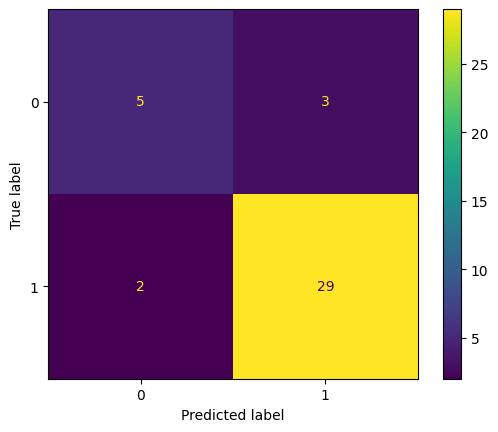

In [46]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(Parkinson_model, X_test, y_test)  
plt.show()  

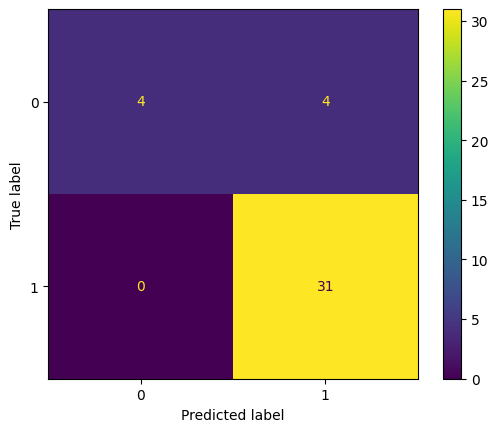

In [47]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(new_Parkinson_Model, X1_test, y1_test)  
plt.show()  

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
#Calculating the MAE for the first Model 
mae_Parkinson_Model = mean_absolute_error(y_test, y_pred)

print('MAE: %.3f' % mae_Parkinson_Model)

MAE: 0.128


In [50]:
mae_new_Parkinson_Model = mean_absolute_error(y1_test, y1_pred)

print('MAE: %.3f' % mae_new_Parkinson_Model)

MAE: 0.103


The Mean Absolute Error(MAE) shows that the old model is fairly accurate considering the small datasets used to train the model but the new model seems better with a lower mae of 0.103 or 1%  . 


In [51]:
print(new_Parkinson_Model.predict([[119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
]]))

[1]


In [74]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scl.transform(input_data_reshaped)

prediction = Parkinson_model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")
# print(input_data)
# print(input_data_as_numpy_array)
# print(std_data)
# print(std_data)
# # 
input_data_as_numpy_array[0]

[1]
The Person has Parkinsons


119.992

In [53]:
237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,0.0074,22.7360,0.305062,0.654172,-7.31055,0.098648,2.416838,0.095032


(237.226,
 247.326,
 225.227,
 0.00298,
 1e-05,
 0.00169,
 0.00182,
 0.00507,
 0.01752,
 0.164,
 0.01035,
 0.01024,
 0.01133,
 0.03104,
 0.0074,
 22.736,
 0.305062,
 0.654172,
 -7.31055,
 0.098648,
 2.416838,
 0.095032)

In [54]:
input_data = (237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,0.0074,22.7360,0.305062,0.654172,-7.31055,0.098648,2.416838,0.095032)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scl.transform(input_data_reshaped)

prediction = Parkinson_model.predict(std_data)
print(prediction)
print(std_data)

if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
[[ 2.00691383  0.5281482   2.40030293 -0.66999766 -0.94428847 -0.55753908
  -0.59687386 -0.55757741 -0.69123864 -0.6493676  -0.57363509 -0.67929423
  -0.77903508 -0.57394352 -0.45319926  0.24036295 -1.79900676 -1.22364877
  -1.4557804  -1.49150792  0.06074225 -1.21500844]]
The Person does not have Parkinsons Disease


### Saving Model
* Pickle - Saving the model using Python inbuilt model called Pickle which enable us to reuse the model when having similar datasets without having to retrain the datasets.

* Joblib -One can also use Joblib which is more efficient on objects that contain large numpy arrays internally, such as fitted scikit-learn estimators, but can only pickle to the disk and not to a string.



In [55]:
new_Parkinson_Model
import pickle
with open('new_Parkinson_Model.pkl','wb') as f:
    pickle.dump(new_Parkinson_Model,f)

In [56]:
import pickle
s = pickle.dumps(Parkinson_model)
Parkinson_model = pickle.loads(s)
Parkinson_model.predict(X[0:1])
y[0]

1

In [57]:
import pickle
s = pickle.dumps(new_Parkinson_Model)
new_Parkinson_Model = pickle.loads(s)
new_Parkinson_Model.predict(X[0:1])
y[0]

1

In [58]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [59]:
from joblib import dump, load
dump(Parkinson_model, 'Parkinson_model.pkl') 

['Parkinson_model.pkl']

In [60]:
with open("D:/VS/HackOMed/new_Parkinson_Model.pickle", 'rb') as f:

    student = pickle.load(f) # deserialize using load()
    print(student) # print student names

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])


In [61]:
from joblib import dump, load
dump(new_Parkinson_Model, 'new_Parkinson_Model.joblib') 

['new_Parkinson_Model.joblib']